In [2]:
import pandas as pd
from sklearn.decomposition import NMF
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt
# PyTorch related imports would go here
import numpy as np

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer
from us import states
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import re

In [4]:
state_names = [state.name.lower() for state in states.STATES]
state_abbrs = [state.abbr for state in states.STATES]
city_df = pd.read_csv('PM25-Speciated/worldcities.csv')
city_names = city_df['city_ascii'].str.lower().tolist()  # First column
country_names = city_df['country'].str.lower().tolist()  # First column

In [5]:
stop_words = TfidfVectorizer(stop_words='english').get_stop_words()
stop_words = list(list(stop_words)+ city_names + country_names + state_names + state_abbrs)

# Original Data

In [6]:
# #DATASET_NAME = "SpeciateV5.3_PM_AE6.csv"
# DATASET_NAME = "SpeciateV5.3_PM_All.csv"
# df = pd.read_csv('PM25-Speciated/specviate_v5_3datasets/'+DATASET_NAME, encoding='ISO-8859-1')

In [7]:
DATASET_NAME = "PM_AE6_v5.3_v10182024.csv"
# DATASET_NAME = "PM_ALL2.5um_v5.3_v10182024.csv"
df = pd.read_csv('PM25-Speciated/reviseddatasetwithtotalocandec/'+DATASET_NAME, encoding='ISO-8859-1')

In [8]:
df

,PROFILE_CODE,PROFILE_NAME,PROFILE_TYPE,CONTROLS,REGION,MASTER_POLLUTANT,TOTAL,QSCORE,QSCORE_DESC,QUALITY,...,CATEGORY_LEVEL_2_Sector_Equipment,CATEGORY_LEVEL_3_ Fuel_Product,SPECIES_ID,CAS,SPECIES_NAME,WEIGHT_PERCENT,INCLUDE_IN_SUM,UNCERTAINTY_PERCENT,SPEC_MW,Data_Origin
0,3766AE6,Forest Fire - AE6,PM-AE6,Uncontrolled,Northwestern Colorado,PM,100.0,26.0,Excellent,C,...,Biomass Burning; Wildfire,Pinyon-juniper,2302,24203-36-9,Potassium ion,0.120300,Yes,0.095900,39.097800,DRI
1,3766AE6,Forest Fire - AE6,PM-AE6,Uncontrolled,Northwestern Colorado,PM,100.0,26.0,Excellent,C,...,Biomass Burning; Wildfire,Pinyon-juniper,767,7440-62-2,Vanadium,0.000100,Yes,0.000200,50.941500,DRI
2,3766AE6,Forest Fire - AE6,PM-AE6,Uncontrolled,Northwestern Colorado,PM,100.0,26.0,Excellent,C,...,Biomass Burning; Wildfire,Pinyon-juniper,696,7440-23-5,Sodium,0.012200,Yes,0.013000,22.989769,DRI
3,3766AE6,Forest Fire - AE6,PM-AE6,Uncontrolled,Northwestern Colorado,PM,100.0,26.0,Excellent,C,...,Biomass Burning; Wildfire,Pinyon-juniper,699,14808-79-8,Sulfate,0.133200,Yes,0.062900,96.060000,DRI
4,3766AE6,Forest Fire - AE6,PM-AE6,Uncontrolled,Northwestern Colorado,PM,100.0,26.0,Excellent,C,...,Biomass Burning; Wildfire,Pinyon-juniper,700,7704-34-9,Sulfur,0.079200,No,0.021300,32.060000,DRI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4453,SUGP02,Sugar Cane Pre-Harvest Burning Mexico,PM-AE6,NaN,"Mexico - Chiapas, Jalisco, Veracruz, and Morelos",PM,100.0,19.5,Good,A,...,Biomass Burning; Agriculture,Pre-harvest Sugar Cane,613,14797-55-8,Nitrate,0.168067,Yes,0.000000,62.005000,Literature
4454,SUGP02,Sugar Cane Pre-Harvest Burning Mexico,PM-AE6,NaN,"Mexico - Chiapas, Jalisco, Veracruz, and Morelos",PM,100.0,19.5,Good,A,...,Biomass Burning; Agriculture,Pre-harvest Sugar Cane,699,14808-79-8,Sulfate,3.361345,Yes,0.504202,96.060000,Literature
4455,SUGP02,Sugar Cane Pre-Harvest Burning Mexico,PM-AE6,NaN,"Mexico - Chiapas, Jalisco, Veracruz, and Morelos",PM,100.0,19.5,Good,A,...,Biomass Burning; Agriculture,Pre-harvest Sugar Cane,784,14798-03-9,Ammonium,2.184874,Yes,0.420168,18.038000,Literature
4456,SUGP02,Sugar Cane Pre-Harvest Burning Mexico,PM-AE6,NaN,"Mexico - Chiapas, Jalisco, Veracruz, and Morelos",PM,100.0,19.5,Good,A,...,Biomass Burning; Agriculture,Pre-harvest Sugar Cane,797,7440-44-0,Elemental Carbon,28.571429,Yes,7.563025,12.011000,Literature


In [9]:
df = df.pivot_table(index=['PROFILE_CODE', 'PROFILE_NAME'], columns='SPECIES_NAME', values='WEIGHT_PERCENT', aggfunc='first').reset_index()
# Fill NaN values with 0 (or any other value you prefer)
df = df.fillna(0)

In [10]:
df

SPECIES_NAME,PROFILE_CODE,PROFILE_NAME,Aluminum,Ammonium,Antimony,Arsenic,Bromine,Cadmium,Calcium,Calcium ion,...,Silicon,Sodium,Sodium ion,Sulfate,Sulfur,Tin,Titanium,Vanadium,Zinc,Zirconium
0,3766AE6,Forest Fire - AE6,0.015400,0.110500,0.000500,0.000300,0.0,0.000100,0.369300,0.0,...,0.062000,0.012200,0.0,0.133200,0.0792,0.001500,0.001500,0.000100,0.002900,0.000000
1,5674,Marine Vessel - Main Engine - Heavy Fuel Oil,0.771625,0.000000,0.019000,0.000000,0.0,0.003958,0.259125,0.0,...,0.000000,0.000000,0.0,38.032500,0.0000,0.013281,0.005000,1.515625,0.018250,0.000000
2,5675AE6,Marine Vessel - Auxiliary Engine - Marine Gas ...,0.000000,0.000000,0.061466,0.000000,0.0,0.023641,1.912530,0.0,...,0.340426,0.000000,0.0,12.078014,0.0000,0.035461,0.014184,0.082742,0.200946,0.000000
3,8873AE6,Aircraft Exhaust,0.000000,1.791897,0.000000,0.000000,0.0,0.000000,0.000000,0.0,...,0.000000,0.000000,0.0,6.867400,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000
4,8898a,Outdoor Hydronic Heater- one stage updraft con...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,...,0.017300,0.010700,0.0,0.044100,0.0147,0.000000,0.000000,0.000000,0.007760,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214,95870,Catalytic Woodstove Startup Wood Composite,0.000000,0.000000,0.001704,0.000111,0.0,0.006554,0.056238,0.0,...,0.026435,0.045670,0.0,0.417652,0.0000,0.010290,0.001487,0.000154,0.045448,0.000927
215,95871,Catalytic Woodstove Burn Phase Composite Birch,0.000000,0.000000,0.010937,0.000005,0.0,0.006001,0.024024,0.0,...,0.101690,0.021691,0.0,1.906428,0.0000,0.008238,0.000061,0.000311,0.183862,0.000196
216,95872,Catalytic Woodstove Burn Phase Composite Spruce,0.000355,0.000000,0.000725,0.000006,0.0,0.002385,0.043209,0.0,...,0.001333,0.003175,0.0,0.359246,0.0000,0.001160,0.000393,0.000060,0.032112,0.000267
217,95873,Catalytic Woodstove Burn Phase and Wood Composite,0.000149,0.000000,0.006648,0.000006,0.0,0.004483,0.032082,0.0,...,0.059540,0.013915,0.0,1.256611,0.0000,0.005265,0.000200,0.000206,0.120127,0.000226


In [11]:
def clean_text(text):
    # Remove numbers and special characters
    text = re.sub(r'[^A-Za-z\s]', ' ', text)
    # Convert to lowercase
    text = text.lower()
    # Remove stopwords
    text = ' '.join(word for word in text.split() if word not in stop_words)
    return text

In [12]:
# df['name'] = df['name'].apply(clean_text)

In [13]:
df

SPECIES_NAME,PROFILE_CODE,PROFILE_NAME,Aluminum,Ammonium,Antimony,Arsenic,Bromine,Cadmium,Calcium,Calcium ion,...,Silicon,Sodium,Sodium ion,Sulfate,Sulfur,Tin,Titanium,Vanadium,Zinc,Zirconium
0,3766AE6,Forest Fire - AE6,0.015400,0.110500,0.000500,0.000300,0.0,0.000100,0.369300,0.0,...,0.062000,0.012200,0.0,0.133200,0.0792,0.001500,0.001500,0.000100,0.002900,0.000000
1,5674,Marine Vessel - Main Engine - Heavy Fuel Oil,0.771625,0.000000,0.019000,0.000000,0.0,0.003958,0.259125,0.0,...,0.000000,0.000000,0.0,38.032500,0.0000,0.013281,0.005000,1.515625,0.018250,0.000000
2,5675AE6,Marine Vessel - Auxiliary Engine - Marine Gas ...,0.000000,0.000000,0.061466,0.000000,0.0,0.023641,1.912530,0.0,...,0.340426,0.000000,0.0,12.078014,0.0000,0.035461,0.014184,0.082742,0.200946,0.000000
3,8873AE6,Aircraft Exhaust,0.000000,1.791897,0.000000,0.000000,0.0,0.000000,0.000000,0.0,...,0.000000,0.000000,0.0,6.867400,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000
4,8898a,Outdoor Hydronic Heater- one stage updraft con...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,...,0.017300,0.010700,0.0,0.044100,0.0147,0.000000,0.000000,0.000000,0.007760,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214,95870,Catalytic Woodstove Startup Wood Composite,0.000000,0.000000,0.001704,0.000111,0.0,0.006554,0.056238,0.0,...,0.026435,0.045670,0.0,0.417652,0.0000,0.010290,0.001487,0.000154,0.045448,0.000927
215,95871,Catalytic Woodstove Burn Phase Composite Birch,0.000000,0.000000,0.010937,0.000005,0.0,0.006001,0.024024,0.0,...,0.101690,0.021691,0.0,1.906428,0.0000,0.008238,0.000061,0.000311,0.183862,0.000196
216,95872,Catalytic Woodstove Burn Phase Composite Spruce,0.000355,0.000000,0.000725,0.000006,0.0,0.002385,0.043209,0.0,...,0.001333,0.003175,0.0,0.359246,0.0000,0.001160,0.000393,0.000060,0.032112,0.000267
217,95873,Catalytic Woodstove Burn Phase and Wood Composite,0.000149,0.000000,0.006648,0.000006,0.0,0.004483,0.032082,0.0,...,0.059540,0.013915,0.0,1.256611,0.0000,0.005265,0.000200,0.000206,0.120127,0.000226


In [14]:
# numeric_cols = df.select_dtypes(include=[np.number]).columns
# text_cols = df.select_dtypes(include=[object]).columns

# print(text_cols)

# agg_funcs = {col: 'mean' for col in numeric_cols}
# agg_funcs.update({col: lambda x: np.random.choice(x) for col in text_cols if col != 'name'})

# pivot_df = df.groupby('name').agg(agg_funcs).reset_index()

In [15]:
# cols = list(pivot_df.columns)
# cols.insert(0, cols.pop(cols.index('code')))
# pivot_df = pivot_df[cols]
# pivot_df

In [16]:
pivot_df = df
pivot_df

SPECIES_NAME,PROFILE_CODE,PROFILE_NAME,Aluminum,Ammonium,Antimony,Arsenic,Bromine,Cadmium,Calcium,Calcium ion,...,Silicon,Sodium,Sodium ion,Sulfate,Sulfur,Tin,Titanium,Vanadium,Zinc,Zirconium
0,3766AE6,Forest Fire - AE6,0.015400,0.110500,0.000500,0.000300,0.0,0.000100,0.369300,0.0,...,0.062000,0.012200,0.0,0.133200,0.0792,0.001500,0.001500,0.000100,0.002900,0.000000
1,5674,Marine Vessel - Main Engine - Heavy Fuel Oil,0.771625,0.000000,0.019000,0.000000,0.0,0.003958,0.259125,0.0,...,0.000000,0.000000,0.0,38.032500,0.0000,0.013281,0.005000,1.515625,0.018250,0.000000
2,5675AE6,Marine Vessel - Auxiliary Engine - Marine Gas ...,0.000000,0.000000,0.061466,0.000000,0.0,0.023641,1.912530,0.0,...,0.340426,0.000000,0.0,12.078014,0.0000,0.035461,0.014184,0.082742,0.200946,0.000000
3,8873AE6,Aircraft Exhaust,0.000000,1.791897,0.000000,0.000000,0.0,0.000000,0.000000,0.0,...,0.000000,0.000000,0.0,6.867400,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000
4,8898a,Outdoor Hydronic Heater- one stage updraft con...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,...,0.017300,0.010700,0.0,0.044100,0.0147,0.000000,0.000000,0.000000,0.007760,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214,95870,Catalytic Woodstove Startup Wood Composite,0.000000,0.000000,0.001704,0.000111,0.0,0.006554,0.056238,0.0,...,0.026435,0.045670,0.0,0.417652,0.0000,0.010290,0.001487,0.000154,0.045448,0.000927
215,95871,Catalytic Woodstove Burn Phase Composite Birch,0.000000,0.000000,0.010937,0.000005,0.0,0.006001,0.024024,0.0,...,0.101690,0.021691,0.0,1.906428,0.0000,0.008238,0.000061,0.000311,0.183862,0.000196
216,95872,Catalytic Woodstove Burn Phase Composite Spruce,0.000355,0.000000,0.000725,0.000006,0.0,0.002385,0.043209,0.0,...,0.001333,0.003175,0.0,0.359246,0.0000,0.001160,0.000393,0.000060,0.032112,0.000267
217,95873,Catalytic Woodstove Burn Phase and Wood Composite,0.000149,0.000000,0.006648,0.000006,0.0,0.004483,0.032082,0.0,...,0.059540,0.013915,0.0,1.256611,0.0000,0.005265,0.000200,0.000206,0.120127,0.000226


In [17]:
pivot_df.iloc[:,2:49].head()

SPECIES_NAME,Aluminum,Ammonium,Antimony,Arsenic,Bromine,Cadmium,Calcium,Calcium ion,Chloride ion,Chlorine,...,Silicon,Sodium,Sodium ion,Sulfate,Sulfur,Tin,Titanium,Vanadium,Zinc,Zirconium
0,0.015400,0.110500,0.000500,0.0003,0.0,0.000100,0.369300,0.0,0.207,0.0,...,0.062000,0.0122,0.0,0.133200,0.0792,0.001500,0.001500,0.000100,0.002900,0.0
1,0.771625,0.000000,0.019000,0.0000,0.0,0.003958,0.259125,0.0,0.000,0.0,...,0.000000,0.0000,0.0,38.032500,0.0000,0.013281,0.005000,1.515625,0.018250,0.0
2,0.000000,0.000000,0.061466,0.0000,0.0,0.023641,1.912530,0.0,0.000,0.0,...,0.340426,0.0000,0.0,12.078014,0.0000,0.035461,0.014184,0.082742,0.200946,0.0
3,0.000000,1.791897,0.000000,0.0000,0.0,0.000000,0.000000,0.0,0.000,0.0,...,0.000000,0.0000,0.0,6.867400,0.0000,0.000000,0.000000,0.000000,0.000000,0.0
4,0.000000,0.000000,0.000000,0.0000,0.0,0.000000,0.000000,0.0,0.000,0.0,...,0.017300,0.0107,0.0,0.044100,0.0147,0.000000,0.000000,0.000000,0.007760,0.0


# Clustering based on numeric values

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from collections import Counter

In [19]:
def assign_cluster_name(cluster):
    names = pivot_df[pivot_df['speciated_cluster'] == cluster]['PROFILE_NAME']
    most_common_name = Counter(names).most_common(1)[0][0]
    return most_common_name

In [20]:
X = pivot_df.iloc[:, 2:49]
#scaler = StandardScaler()
# scaler = MinMaxScaler()
# X = scaler.fit_transform(X)

In [21]:
X

SPECIES_NAME,Aluminum,Ammonium,Antimony,Arsenic,Bromine,Cadmium,Calcium,Calcium ion,Chloride ion,Chlorine,...,Silicon,Sodium,Sodium ion,Sulfate,Sulfur,Tin,Titanium,Vanadium,Zinc,Zirconium
0,0.015400,0.110500,0.000500,0.000300,0.0,0.000100,0.369300,0.0,0.207000,0.0,...,0.062000,0.012200,0.0,0.133200,0.0792,0.001500,0.001500,0.000100,0.002900,0.000000
1,0.771625,0.000000,0.019000,0.000000,0.0,0.003958,0.259125,0.0,0.000000,0.0,...,0.000000,0.000000,0.0,38.032500,0.0000,0.013281,0.005000,1.515625,0.018250,0.000000
2,0.000000,0.000000,0.061466,0.000000,0.0,0.023641,1.912530,0.0,0.000000,0.0,...,0.340426,0.000000,0.0,12.078014,0.0000,0.035461,0.014184,0.082742,0.200946,0.000000
3,0.000000,1.791897,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,...,0.000000,0.000000,0.0,6.867400,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,...,0.017300,0.010700,0.0,0.044100,0.0147,0.000000,0.000000,0.000000,0.007760,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214,0.000000,0.000000,0.001704,0.000111,0.0,0.006554,0.056238,0.0,0.000000,0.0,...,0.026435,0.045670,0.0,0.417652,0.0000,0.010290,0.001487,0.000154,0.045448,0.000927
215,0.000000,0.000000,0.010937,0.000005,0.0,0.006001,0.024024,0.0,0.000000,0.0,...,0.101690,0.021691,0.0,1.906428,0.0000,0.008238,0.000061,0.000311,0.183862,0.000196
216,0.000355,0.000000,0.000725,0.000006,0.0,0.002385,0.043209,0.0,0.000000,0.0,...,0.001333,0.003175,0.0,0.359246,0.0000,0.001160,0.000393,0.000060,0.032112,0.000267
217,0.000149,0.000000,0.006648,0.000006,0.0,0.004483,0.032082,0.0,0.000000,0.0,...,0.059540,0.013915,0.0,1.256611,0.0000,0.005265,0.000200,0.000206,0.120127,0.000226


In [22]:
model = NMF(n_components=32, init='random', random_state=0, max_iter=1000)
W = model.fit_transform(X)
H = model.components_

# What features to use for clustering

In [23]:
# Assuming 'target' is the category column, and 'name' is the label
X = pivot_df.iloc[:, 2:49]
#X = W

# Hierarchical Clustering

## k-NN Graph Construction

In [24]:
from sklearn.neighbors import NearestNeighbors
import networkx as nx
from scipy.sparse.linalg import svds

In [25]:
# Apply SVD to X
U, S, VT = svds(X.values, k=16)
X_svd = U @ np.diag(S) @ VT

In [26]:
X = X_svd

In [27]:
# Compute KNN

K = 15
knn = NearestNeighbors(n_neighbors=K)  # You can change the number of neighbors
knn.fit(X)
distances, indices = knn.kneighbors(X)

# Create a graph
G = nx.Graph()

# Add nodes with PROFILE_NAME as labels
for i, profile_name in enumerate(df['PROFILE_NAME']):
    G.add_node(i, label=profile_name)

# Add edges based on KNN
for i, neighbors in enumerate(indices):
    for neighbor in neighbors:
        if i != neighbor:  # Avoid self-loops
            G.add_edge(i, neighbor)

In [28]:
import matplotlib
matplotlib.use('Agg')  # Use a non-interactive backend

In [29]:
# pos = nx.spring_layout(G)  # Layout for visualization
# labels = nx.get_node_attributes(G, 'label')

# plt.figure(figsize=(50, 50))
# nx.draw(G, pos, with_labels=True, labels=labels, node_size=100, node_color='skyblue', font_size=10, font_color='black', edge_color='gray')
# plt.title('K-Nearest Neighbor Graph')
# plt.show()

# Community Dectection

In [30]:
import cdlib
from cdlib import algorithms
import networkx as nx
# G = nx.karate_club_graph()

# non-overlap louvain
coms = algorithms.louvain(G, weight='weight', resolution=1., randomize=False)

Note: to be able to use all crisp methods, you need to install some additional packages:  {'leidenalg', 'bayanpy', 'graph_tool', 'infomap', 'wurlitzer'}
Note: to be able to use all crisp methods, you need to install some additional packages:  {'pyclustering', 'ASLPAw'}
Note: to be able to use all crisp methods, you need to install some additional packages:  {'infomap', 'leidenalg', 'wurlitzer'}


In [31]:
print(coms.method_name)
print(coms.communities)
print(coms.node_coverage)
print(coms.overlap )
print(coms.method_parameters)
#print(coms.to_json)
print(coms.average_internal_degree())
print(coms.average_internal_degree(summary=False))

Louvain
[[16, 22, 32, 33, 36, 38, 42, 44, 46, 49, 51, 59, 61, 63, 65, 66, 70, 75, 77, 80, 82, 88, 89, 90, 92, 95, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 136, 146, 147, 148, 165, 168, 171, 179], [4, 17, 28, 47, 58, 60, 87, 96, 99, 101, 106, 107, 108, 118, 119, 120, 121, 122, 123, 124, 135, 138, 139, 144, 190, 192, 194, 195, 199, 201, 202, 203, 204, 207, 209, 210, 211, 214, 216], [12, 13, 19, 20, 23, 41, 52, 69, 71, 72, 73, 76, 81, 83, 84, 86, 91, 94, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 166, 167, 186, 187], [0, 2, 3, 5, 14, 15, 26, 27, 30, 37, 40, 43, 48, 54, 64, 68, 79, 110, 111, 114, 116, 141, 142, 143, 145, 191, 193, 198, 205, 206, 212, 213, 215, 217], [6, 7, 8, 9, 10, 18, 21, 24, 25, 34, 62, 67, 74, 97, 98, 100, 102, 103, 104, 105, 109, 113, 115, 117, 137, 140, 188, 189, 196, 197, 200, 208, 218], [1, 11, 29, 31, 35, 39, 45, 50, 53, 55, 56, 57, 78, 85, 93, 112, 149], [169, 170, 172, 173, 174, 175, 176, 177, 178, 180, 181, 182, 183, 184

In [32]:
com_map={}

for i in range(len(coms.communities)):
    community = coms.communities[i]
    for j in community:
        com_map[j] = i
        
com_map

{16: 0,
 22: 0,
 32: 0,
 33: 0,
 36: 0,
 38: 0,
 42: 0,
 44: 0,
 46: 0,
 49: 0,
 51: 0,
 59: 0,
 61: 0,
 63: 0,
 65: 0,
 66: 0,
 70: 0,
 75: 0,
 77: 0,
 80: 0,
 82: 0,
 88: 0,
 89: 0,
 90: 0,
 92: 0,
 95: 0,
 125: 0,
 126: 0,
 127: 0,
 128: 0,
 129: 0,
 130: 0,
 131: 0,
 132: 0,
 133: 0,
 134: 0,
 136: 0,
 146: 0,
 147: 0,
 148: 0,
 165: 0,
 168: 0,
 171: 0,
 179: 0,
 4: 1,
 17: 1,
 28: 1,
 47: 1,
 58: 1,
 60: 1,
 87: 1,
 96: 1,
 99: 1,
 101: 1,
 106: 1,
 107: 1,
 108: 1,
 118: 1,
 119: 1,
 120: 1,
 121: 1,
 122: 1,
 123: 1,
 124: 1,
 135: 1,
 138: 1,
 139: 1,
 144: 1,
 190: 1,
 192: 1,
 194: 1,
 195: 1,
 199: 1,
 201: 1,
 202: 1,
 203: 1,
 204: 1,
 207: 1,
 209: 1,
 210: 1,
 211: 1,
 214: 1,
 216: 1,
 12: 2,
 13: 2,
 19: 2,
 20: 2,
 23: 2,
 41: 2,
 52: 2,
 69: 2,
 71: 2,
 72: 2,
 73: 2,
 76: 2,
 81: 2,
 83: 2,
 84: 2,
 86: 2,
 91: 2,
 94: 2,
 150: 2,
 151: 2,
 152: 2,
 153: 2,
 154: 2,
 155: 2,
 156: 2,
 157: 2,
 158: 2,
 159: 2,
 160: 2,
 161: 2,
 162: 2,
 163: 2,
 164: 2,
 166: 2,
 

In [33]:
coms_l = [algorithms.louvain(G), algorithms.label_propagation(G), algorithms.walktrap(G)]
overlap_coms = algorithms.endntm(G, coms_l)

In [34]:
print(overlap_coms.communities)

[[0, 2, 3, 4, 5, 8, 14, 15, 17, 21, 25, 26, 27, 30, 34, 37, 40, 43, 47, 48, 54, 58, 62, 64, 67, 68, 79, 96, 97, 98, 99, 100, 101, 102, 103, 108, 109, 110, 111, 114, 116, 117, 137, 138, 139, 141, 142, 143, 144, 145, 170, 181, 184, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217], [128, 129, 130, 131, 132, 133, 134, 136, 16, 146, 147, 148, 22, 32, 33, 36, 165, 38, 39, 168, 41, 42, 171, 44, 46, 49, 51, 179, 59, 61, 63, 65, 66, 70, 75, 77, 80, 82, 88, 89, 90, 92, 95, 125, 126, 127], [12, 13, 19, 20, 150, 23, 151, 153, 154, 155, 156, 152, 158, 157, 160, 161, 162, 163, 159, 164, 166, 167, 165, 41, 39, 52, 186, 187, 69, 71, 72, 73, 76, 81, 83, 84, 86, 91, 94], [1, 11, 78, 85, 149, 89, 29, 93, 31, 35, 39, 45, 112, 50, 53, 55, 56, 57], [169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 180, 181, 182, 183, 184, 185], [6, 7, 104, 9, 10, 74, 105, 140, 113, 18, 115, 24, 218, 188], [135, 202, 106, 107, 120, 28

In [35]:
overlap_com_map={}

for i in range(len(overlap_coms.communities)):
    community = overlap_coms.communities[i]
    for j in community:
        if j in overlap_com_map:
            overlap_com_map[j].append(i)
        else:
            overlap_com_map[j] = [i]
            
overlap_com_map

{0: [0],
 2: [0],
 3: [0],
 4: [0],
 5: [0],
 8: [0],
 14: [0],
 15: [0],
 17: [0],
 21: [0],
 25: [0],
 26: [0],
 27: [0],
 30: [0],
 34: [0],
 37: [0],
 40: [0],
 43: [0],
 47: [0],
 48: [0],
 54: [0],
 58: [0],
 62: [0],
 64: [0],
 67: [0],
 68: [0],
 79: [0],
 96: [0],
 97: [0],
 98: [0],
 99: [0],
 100: [0],
 101: [0],
 102: [0],
 103: [0],
 108: [0],
 109: [0],
 110: [0],
 111: [0],
 114: [0],
 116: [0],
 117: [0],
 137: [0],
 138: [0],
 139: [0],
 141: [0],
 142: [0],
 143: [0],
 144: [0],
 145: [0],
 170: [0, 4],
 181: [0, 4],
 184: [0, 4],
 189: [0],
 190: [0],
 191: [0],
 192: [0],
 193: [0],
 194: [0],
 195: [0],
 196: [0],
 197: [0],
 198: [0],
 199: [0],
 200: [0],
 201: [0],
 203: [0],
 204: [0],
 205: [0],
 206: [0],
 207: [0],
 208: [0],
 209: [0],
 210: [0],
 211: [0],
 212: [0],
 213: [0],
 214: [0],
 215: [0],
 216: [0],
 217: [0],
 128: [1],
 129: [1],
 130: [1],
 131: [1],
 132: [1],
 133: [1],
 134: [1],
 136: [1],
 16: [1],
 146: [1],
 147: [1],
 148: [1],
 22: [

In [36]:
for i in range(len(pivot_df)):
    if i not in overlap_com_map:
        print(i)

In [37]:
# nx.write_graphml(G, 'knn_graph.graphml')


labels=[]
# y = [i+'-'+j for i,j in zip(pivot_df['PROFILE_NAME'],pivot_df['PROFILE_CODE'])]
y = [str(i) for i in pivot_df['PROFILE_CODE']]
labels = dict(zip(range(len(y)), y))

print(labels)

overlap_com_map_str = {key: ",".join([str(i) for i in value]) for key, value in overlap_com_map.items()}

nx.set_node_attributes(G, labels, 'labels')
nx.set_node_attributes(G, com_map, 'non_overlap_community')
nx.set_node_attributes(G, overlap_com_map_str, 'overlap_community')

filename = DATASET_NAME+"KNN"+str(K)+'.gexf'
print("Writing gephi...."+filename)
nx.write_gexf(G, filename)
print("Done....")

{0: '3766AE6', 1: '5674', 2: '5675AE6', 3: '8873AE6', 4: '8898a', 5: '8901a', 6: '8902a', 7: '8992', 8: '8993', 9: '8994', 10: '8995', 11: '8996', 12: '91100', 13: '91101', 14: '91102', 15: '91103', 16: '91104', 17: '91105', 18: '91106', 19: '91107', 20: '91108', 21: '91109', 22: '91110', 23: '91111', 24: '91112', 25: '91113', 26: '91114', 27: '91115', 28: '91116', 29: '91117', 30: '91118', 31: '91119', 32: '91120', 33: '91121', 34: '91122', 35: '91123', 36: '91124', 37: '91125', 38: '91126', 39: '91127', 40: '91128', 41: '91129', 42: '91130', 43: '91131', 44: '91132', 45: '91133', 46: '91134', 47: '91135', 48: '91136', 49: '91137', 50: '91138', 51: '91139', 52: '91140', 53: '91141', 54: '91142', 55: '91143', 56: '91144', 57: '91145', 58: '91146', 59: '91147', 60: '91148', 61: '91149', 62: '91150', 63: '91151', 64: '91152', 65: '91153', 66: '91154', 67: '91155', 68: '91156', 69: '91157', 70: '91158', 71: '91159', 72: '91160', 73: '91161', 74: '91162', 75: '91163', 76: '91164', 77: '911

In [38]:
pivot_df.head()

SPECIES_NAME,PROFILE_CODE,PROFILE_NAME,Aluminum,Ammonium,Antimony,Arsenic,Bromine,Cadmium,Calcium,Calcium ion,...,Silicon,Sodium,Sodium ion,Sulfate,Sulfur,Tin,Titanium,Vanadium,Zinc,Zirconium
0,3766AE6,Forest Fire - AE6,0.015400,0.110500,0.000500,0.0003,0.0,0.000100,0.369300,0.0,...,0.062000,0.0122,0.0,0.133200,0.0792,0.001500,0.001500,0.000100,0.002900,0.0
1,5674,Marine Vessel - Main Engine - Heavy Fuel Oil,0.771625,0.000000,0.019000,0.0000,0.0,0.003958,0.259125,0.0,...,0.000000,0.0000,0.0,38.032500,0.0000,0.013281,0.005000,1.515625,0.018250,0.0
2,5675AE6,Marine Vessel - Auxiliary Engine - Marine Gas ...,0.000000,0.000000,0.061466,0.0000,0.0,0.023641,1.912530,0.0,...,0.340426,0.0000,0.0,12.078014,0.0000,0.035461,0.014184,0.082742,0.200946,0.0
3,8873AE6,Aircraft Exhaust,0.000000,1.791897,0.000000,0.0000,0.0,0.000000,0.000000,0.0,...,0.000000,0.0000,0.0,6.867400,0.0000,0.000000,0.000000,0.000000,0.000000,0.0
4,8898a,Outdoor Hydronic Heater- one stage updraft con...,0.000000,0.000000,0.000000,0.0000,0.0,0.000000,0.000000,0.0,...,0.017300,0.0107,0.0,0.044100,0.0147,0.000000,0.000000,0.000000,0.007760,0.0


In [39]:
pivot_df.to_csv("ForSOM_"+DATASET_NAME, index=False)
print("DataFrame saved")

DataFrame saved


## Box Plot

In [40]:
import matplotlib.pyplot as plt

# This magic command ensures that plots are shown inline in Jupyter Notebook
%matplotlib inline

In [41]:
def find_row_number(pivot_df, input_value):
    if isinstance(input_value, int):
        # If the input is an integer, use it directly to access the row number
        return [input_value]
    else:
        # If the input is a string, search in PROFILE_NAME and PROFILE_CODE
        result = pivot_df[(pivot_df['PROFILE_NAME'].str.contains(input_value, case=False, na=False)) |
                          (pivot_df['PROFILE_CODE'].str.contains(input_value, case=False, na=False))]
        if not result.empty:
            return result.index.tolist()
        else:
            return None

# to find element either give profile code as "5674", profile name as "Residual Oil Combustion - Composite"
# or just integer row number from pivot_df

elems = find_row_number(pivot_df, "Forest Fire")
elems

[0, 189, 190, 194, 195, 200, 201, 203, 204]

In [42]:
elem = elems[0]
cluster = next((cluster for cluster in coms.communities if elem in cluster), None)
selected_rows = pivot_df.loc[cluster]

selected_rows

SPECIES_NAME,PROFILE_CODE,PROFILE_NAME,Aluminum,Ammonium,Antimony,Arsenic,Bromine,Cadmium,Calcium,Calcium ion,...,Silicon,Sodium,Sodium ion,Sulfate,Sulfur,Tin,Titanium,Vanadium,Zinc,Zirconium
0,3766AE6,Forest Fire - AE6,0.015400,0.110500,0.000500,0.000300,0.000000,0.000100,0.369300,0.000000,...,0.062000,0.012200,0.000000,0.133200,0.079200,0.001500,0.001500,0.000100,0.002900,0.000000
2,5675AE6,Marine Vessel - Auxiliary Engine - Marine Gas ...,0.000000,0.000000,0.061466,0.000000,0.000000,0.023641,1.912530,0.000000,...,0.340426,0.000000,0.000000,12.078014,0.000000,0.035461,0.014184,0.082742,0.200946,0.000000
3,8873AE6,Aircraft Exhaust,0.000000,1.791897,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,6.867400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,8901a,Outdoor Hydronic Heater- three stage updraft c...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.275000,0.110000,0.000000,1.503000,0.501000,0.000000,0.000000,0.000000,0.000000,0.000000
14,91102,Wildfires - Composite,0.060750,0.879150,0.000700,0.012300,0.000000,0.000550,0.385800,0.000000,...,0.181850,0.573350,0.000000,1.261050,0.431700,0.001450,0.005150,0.000350,0.016700,0.000600
15,91103,Agricultural Burning - Composite,0.030000,1.800000,0.000000,0.000000,0.000000,0.000000,0.033000,0.000000,...,0.015000,0.655000,0.000000,1.645600,0.649950,0.000000,0.001000,0.000000,0.010000,0.000000
26,91114,Wood Fired Boiler - Composite,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.635852,0.000000,...,13.553698,0.150597,0.000000,6.525854,3.095598,0.000000,0.000000,0.000000,0.000000,0.000000
27,91115,Distillate Oil Combustion - Composite,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.020000,0.000000,...,0.800000,0.000000,0.000000,19.000000,2.742303,0.000000,0.000000,0.000000,0.155000,0.000000
30,91118,Dairy Soil - Composite,1.290000,3.330000,0.000000,0.010000,0.000000,0.010000,2.140000,0.000000,...,3.990000,0.500000,0.000000,4.460000,2.610000,0.000000,0.050000,0.000000,0.030000,0.000000
37,91125,Lignite Combustion - Composite,3.786299,0.407334,0.008546,0.002136,0.000000,0.002390,14.521613,0.000000,...,6.390464,0.194922,0.000000,7.563655,3.309694,0.008546,0.685505,0.042041,0.295805,0.018793


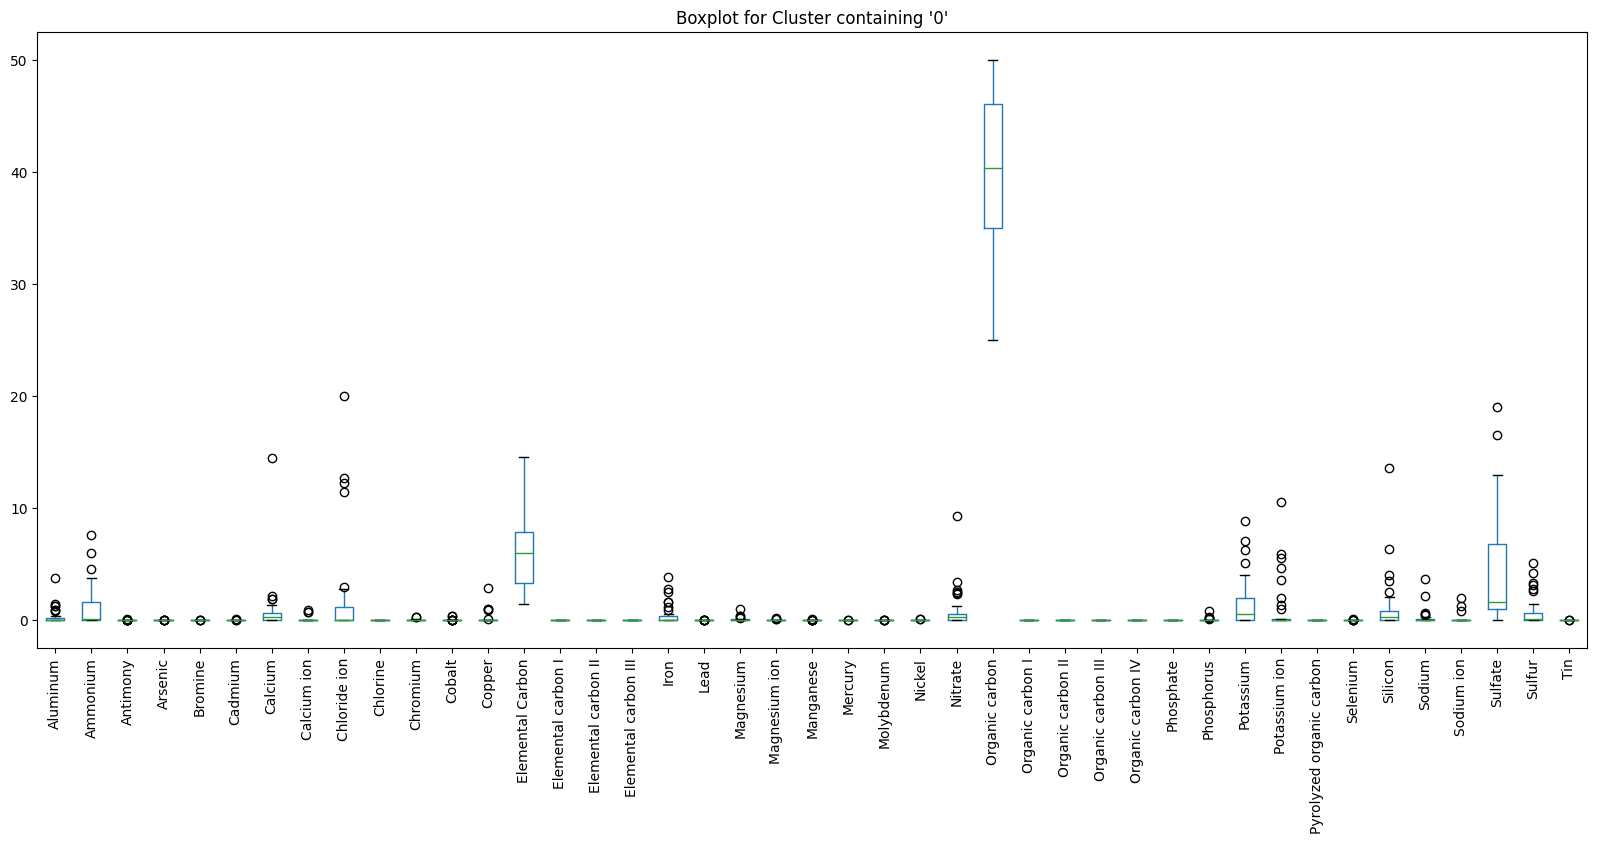

In [43]:
ax = selected_rows.iloc[:, 2:45].boxplot(figsize=(20, 8), grid=False)  # grid=False removes grid
ax.grid(False)

plt.title(f"Boxplot for Cluster containing '{elem}'")
plt.xticks(rotation=90)  # Rotate x-labels if needed
plt.show()

In [44]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD, NMF

Index(['Aluminum', 'Cobalt', 'Potassium ion', 'Selenium', 'Elemental Carbon'], dtype='object', name='SPECIES_NAME')


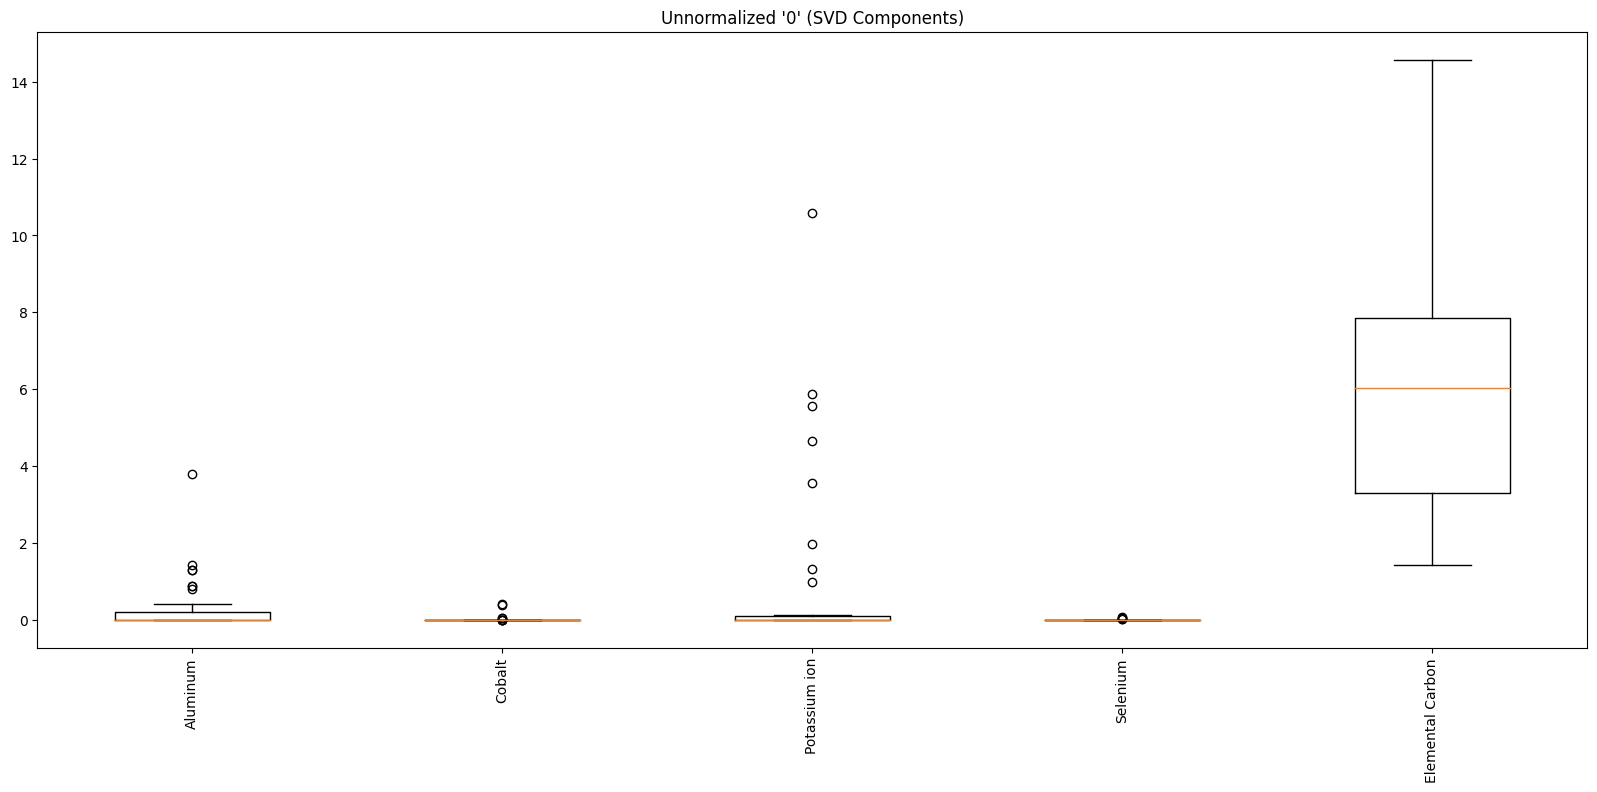

In [46]:
# # Normalize the values
# scaler = StandardScaler()
# normalized_data = scaler.fit_transform(selected_rows.iloc[:, 2:45])

# # Create the first box plot with normalized values
# fig, ax = plt.subplots(figsize=(20, 8))
# ax.boxplot(normalized_data)
# ax.grid(False)
# ax.set_xticklabels(selected_rows.columns[2:45], rotation=90)
# plt.title(f"Boxplot for Cluster containing '{elem}' (Normalized Values)")
# plt.xticks(rotation=90)
# plt.show()

# # Use SVD to find important components
# svd = TruncatedSVD(n_components=5)
# svd_data = svd.fit_transform(selected_rows.iloc[:, 2:45])

# # Get the most important columns based on SVD components
# important_columns_svd = selected_rows.columns[2:45][svd.components_.argmax(axis=1)]
# print(important_columns_svd)


selected_columns = selected_rows.iloc[:,2:45]
    
    
    
U, S, Vt = np.linalg.svd(selected_columns, full_matrices=False)


column_importance = np.sum(Vt**2, axis=0)
important_columns_indices = np.argsort(-column_importance)[:5]

important_columns = selected_columns.columns[important_columns_indices]    

print(important_columns)


# Create the second box plot with SVD components
fig, ax = plt.subplots(figsize=(20, 8))
# ax.boxplot(svd_data)
ax.boxplot(selected_rows[important_columns])
ax.grid(False)
plt.title(f"Unnormalized '{elem}' (SVD Components)")
ax.set_xticklabels(important_columns, rotation=90)
plt.show()


# # Create the second box plot with SVD components
# fig, ax = plt.subplots(figsize=(20, 8))
# scaler = StandardScaler()
# normalized_data = scaler.fit_transform(selected_rows[important_columns_svd])


# # ax.boxplot(svd_data)
# ax.boxplot(normalized_data)
# ax.grid(False)
# plt.title(f"Normalized'{elem}' (SVD Components)")
# ax.set_xticklabels(important_columns_svd, rotation=90)
# plt.show()

# # Use NMF to find important components
# nmf = NMF(n_components=5)
# nmf_data = nmf.fit_transform(selected_rows.iloc[:, 2:45])

# # Get the most important columns based on NMF components
# important_columns_nmf = selected_rows.columns[2:45][nmf.components_.argmax(axis=1)]

# # Create the third box plot with NMF components
# fig, ax = plt.subplots(figsize=(20, 8))
# ax.boxplot(nmf_data)
# ax.grid(False)
# plt.title(f"Boxplot for Cluster containing '{elem}' (NMF Components)")
# ax.set_xticklabels(important_columns_nmf, rotation=90)
# plt.show()


In [ ]:
# # Initialize NMF and fit to the data
# model = NMF(n_components=2, init='random', random_state=0)
# W = model.fit_transform(X)
# H = model.components_

# # Visualize the data
# plt.scatter(W[:, 0], W[:, 1], c=y)
# plt.xlabel('Component 1')
# plt.ylabel('Component 2')
# plt.title('NMF Components')
# plt.colorbar()
# plt.show()

In [ ]:
selected_rows.iloc[:,25]